# <a id='toc1_'></a>[Inaugural Project](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Inaugural Project](#toc1_)    
- [Question 1](#toc2_)    
- [Question 2](#toc3_)    
- [Question 3](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.



Imports and set magics:

In [7]:
#from types import SimpleNamespace
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from HouseholdMOD import HouseholdSpecializationModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# <a id='toc2_'></a>[Question 1](#toc0_)

We have solve the discrete model by looping over all different values for alpha and sigma in a for loop and stored the results in a matrix.

Afterwards we have created a heatmap showing the results.

In [8]:
model = HouseholdSpecializationModelClass()

#Create empty array to store results
ratio_results = np.zeros((3,3))

#Create alpha and sigma values
alpha_range = [0.25,0.5,0.75]
sigma_range = [0.5,1.0,1.5]

#Loop over alpha and sigma
for i, a in enumerate(alpha_range):
    for j,s in enumerate(sigma_range):
        #Change alpha and sigma
        model.par.alpha = a
        model.par.sigma = s

        #Solve model
        model.solve_discrete()

        #Store results
        ratio_results[i, j] = model.opt.HF / model.opt.HM


/Users/johan/Google Drive/04 Økonomi/06 Programming and Nummerical Analysis/02 Git/projects-2023-valros/inauguralproject/HouseholdMOD.py:62: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/johan/Google Drive/04 Økonomi/06 Programming and Nummerical Analysis/02 Git/projects-2023-valros/inauguralproject/HouseholdMOD.py:62: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/johan/Google Drive/04 Økonomi/06 Programming and Nummerical Analysis/02 Git/projects-2023-valros/inauguralproject/HouseholdMOD.py:66: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


/var/folders/3r/1kv5zyk92gj7vdrjg4lsysm80000gn/T/ipykernel_33097/1159171229.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sigma_range)
/var/folders/3r/1kv5zyk92gj7vdrjg4lsysm80000gn/T/ipykernel_33097/1159171229.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(alpha_range)


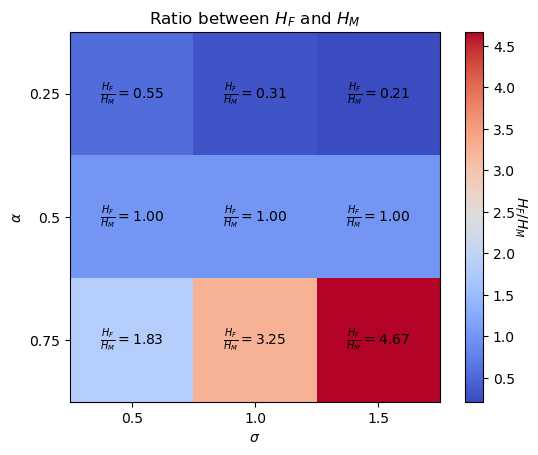

In [9]:
#Plot results in heatmap
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
im = ax.imshow(ratio_results, cmap='coolwarm')

#Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel(r'$H_F/H_M$', rotation=270, labelpad=10)

#Set title
plt.title("Ratio between" + " " + r'$H_F$' + " " + "and" + " " r'$H_M$')

#Set labels
ax.set_xticklabels(sigma_range)
ax.set_yticklabels(alpha_range)
ax.set_xticks(np.arange(len(sigma_range)))
ax.set_yticks(np.arange(len(alpha_range)))
ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$\alpha$')

#Looping over data to create annotations
for i in range(len(alpha_range)):
    for j in range(len(sigma_range)):
        text = ax.text(j, i, r'$\frac{H_F}{H_M}=$'+f"{ratio_results[i, j]:.2f}",
                       ha="center", va="center", color="black")

#Show plot
plt.show()

# <a id='toc3_'></a>[Question 2](#toc0_)

Explain your code and procedure

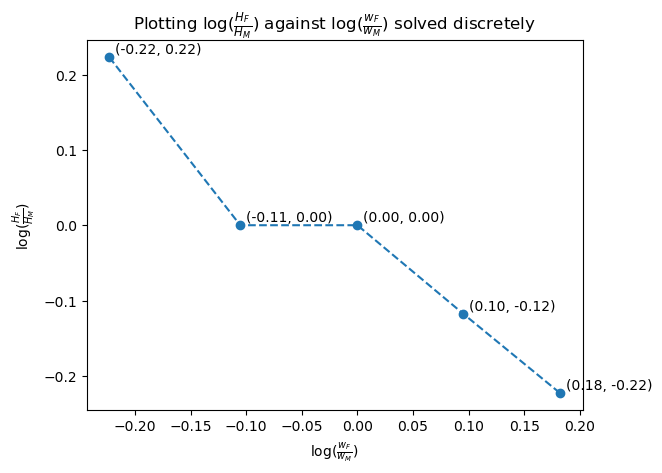

In [10]:
#Reset alpha and sigma to the baseline values
model.par.alpha = 0.5
model.par.sigma = 1.0


#Solving discretely for HF/HM ratio and creating log wF/wM ratio
model.solve_wF_vec(discrete=True)

logHFHM_ratio = model.opt.logHFHM
logwFwM_ratio = np.log([0.8, 0.9, 1.0, 1.1, 1.2])

#Plot results in a plot
plt.plot(logwFwM_ratio, logHFHM_ratio, marker = 'o', linestyle = '--')

#Set title
plt.title("Plotting " + r'$\log(\frac{H_F}{H_M})$' + " against " r'$\log(\frac{w_F}{w_M})$' + " solved discretely")

#Set labels
plt.xlabel(r'$\log(\frac{w_F}{w_M})$')
plt.ylabel(r'$\log(\frac{H_F}{H_M})$')

#Looping over data to create annotations
for i in range(5):
    plt.annotate(f"({logwFwM_ratio[i]:.2f}, {logHFHM_ratio[i]:.2f})", (logwFwM_ratio[i]+0.005, logHFHM_ratio[i]+0.005))

#Show plot
plt.show()

# <a id='toc4_'></a>[Question 3](#toc0_)

HF: [5.1156716  4.74563158 4.45444388 4.21994103 4.02719258]
HM: [4.0925479  4.27103397 4.45450876 4.64194973 4.83267813]
LF: [2.86981522 3.74931497 4.45454514 5.02198044 5.47961346]
LM: [5.88924696 5.16774333 4.45450167 3.75978415 3.08970511]


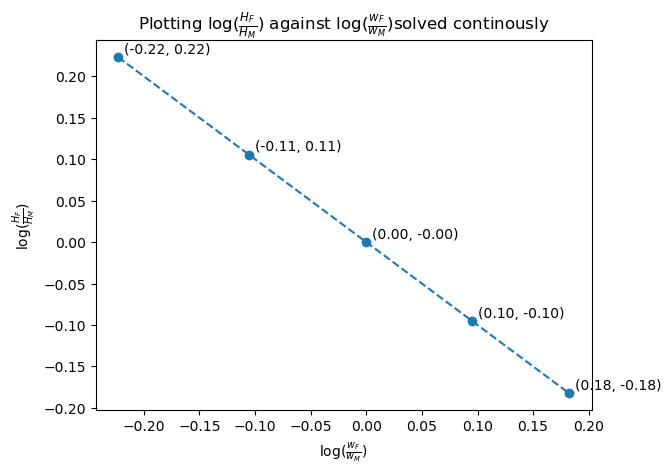

In [11]:
#Reset alpha and sigma to the baseline values
model.par.alpha = 0.5
model.par.sigma = 1.0

#Solving continously for HF/HM ratio and creating log of wFwM ratio
model.solve_wF_vec()

print(f'HF: {model.opt.HF_vec}')
print(f'HM: {model.opt.HM_vec}')
print(f'LF: {model.opt.LF_vec}')
print(f'LM: {model.opt.LM_vec}')

logHFHM_ratio_continous = model.opt.logHFHM
logwFwM_ratio = np.log([0.8, 0.9, 1.0, 1.1, 1.2])

#Plot results in a plot

plt.plot(logwFwM_ratio, logHFHM_ratio_continous, marker = 'o', linestyle = '--')

#Set title
plt.title("Plotting " + r'$\log(\frac{H_F}{H_M})$' + " against " r'$\log(\frac{w_F}{w_M})$' + "solved continously")

#Set labels
plt.xlabel(r'$\log(\frac{w_F}{w_M})$')
plt.ylabel(r'$\log(\frac{H_F}{H_M})$')

#Looping over data to create annotations
for i in range(5):
    plt.annotate(f"({logwFwM_ratio[i]:.2f}, {logHFHM_ratio_continous[i]:.2f})", (logwFwM_ratio[i]+0.005, logHFHM_ratio_continous[i]+0.005))

#Show plot
plt.show()

In [15]:
model.run_regression()
print(f'beta0: {model.opt.beta0:.2f}')
print(f'beta1: {model.opt.beta1:.2f}')

beta0: -0.00
beta1: -1.00


In [16]:
model.beta_target()


0.9700487385649089

In [28]:
model.estimate()

#print(f'alpha: {model.opt.alpha:.2f}')
#print(f'sigma: {model.opt.sigma:.2f}')

TypeError: target() missing 1 required positional argument: 'sigma'

Explain your code and procedure

ADD CONCISE CONLUSION.